# Basic RV Generation

Assuming that we have a suitable uniform psuedo random number generator with us (PRNG), how can we use it to (exactly) sample from any given probability distribution?

## Inversion Sampling

Well, we can form a map from the Uniform distribution to the desired distribution, such that the points with more probability in the target distribution are mapped to the unit space in proportion of their probability densities.

Suppose we have a uniform unit random variable $z \sim U(0,1)$ and we apply a function $f(.)$, to obtain a transformed RV y.

Then we have y and z realted by $y = f(z)$ and their probability densities related by the formulae 

$$
p(y) = p(z)|\frac{dz}{dy}| 
$$

* Note: The probability density of y is related to z, by the jacobian.

Now, if p(y), is our target density function then, we would require a suitable transformation function f such given the secound relation. 

The pdf of z is 1, hense on integrating the pdf relation equation , we get 

$$
z = \int_{\infty}^{y} p(y)dy = h(y) 
$$ 

where h is the cdf function. 

This gives us $y = h^{-1}(z)$, ie if we sample z from $U(0,1)$, and take its invverse cdf of the target distribution, we get the required sample.

This method gives us an exact method to generate the sample, but its biggest flaw is that even the simplest probabilty distributions do not have a analytic cdf (much less the inverse cdf). 

There are serious challenges in deriving the inverse cdfs of even commonly used pdf's, but many have derivations, as inverse cdf's are also required to produce quantiles (useful in other methods)

(Look up Box muller approach for normal distribution)

## Acceptance Rejection Method

The first of our methods for approximate RV sampling is the Rejection Sampling Method. 

The method is directly based on the geometric idea that if we have an evelope pdf over the target, then if can pick a sample from the envelope and select the corresponding point on the target based on the ratio of differences of the probabilites and prob of target, then the samples will mimick the target.

Example, in the image (credits: https://www.cs.helsinki.fi/u/ahonkela/teaching/compstats1/book), we sample from the evelope g(x) or its mutiple with a scalar M (so that g(x) is an envelope). Then we take a unit uniform value u, and if 
$u < \frac{g(x)}{M.f(x)} $, then we pick we take the sample as valid. (Here M*g(x) is the envelope and f(x) is the target)

```{figure} ../images/Random_Variables/Rejection_Sampling.png
---
height: 300px
width: 400px
name: Rejection Sampling
---
Rejection Sampling.
```

This method makes intutive sense, as we know how to take sample from g(x), so a sample $x_{i}$ is in tune with its prob density, and the closer the target prob at $x_{i}$, greater its chance of getting picked. (Complete Proof will follow)

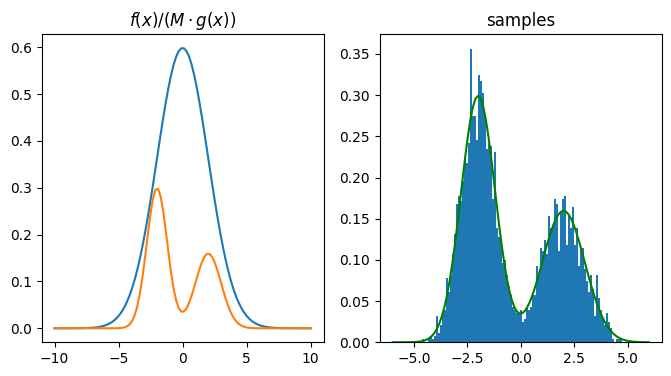

In [16]:
# Random sampling a target probability distribution using the Rejection Sampling method

import numpy as np
from numpy import random
import matplotlib.pyplot as plt
 
def RejectionSampler(target_pdf, envelope_pdf, envelope_sample, M, N):
    i = 0
    x = np.zeros(N)
    while i < N:
        x_prop = envelope_sample()
        u = random.uniform(0, 1)
        if (u * M * envelope_pdf(x_prop)) < target_pdf(x_prop):
            # Accept the sample and record it
            x[i] = x_prop
            i += 1
    return x

random.seed(17)
 
# Normal Distribution
def normpdf(x, mu, sigma):
    return 1/np.sqrt(2*np.pi*sigma**2) * np.exp(-(x-mu)**2 / (2*sigma**2))
 
# Target Distribution as a mixture of two normals
def target_pdf(x):
    return 0.6*normpdf(x, -2, 0.8) + 0.4*normpdf(x, 2, 1)
 
# Define the proposal pdf and a function to sample from it
def envelope_pdf(x):
    return normpdf(x, 0, 2)
 
def envelope_sample():
    return 2*random.randn()
 
# Using Suitable M, such that the M*g(x) > f(x) for all x
M = 3
N = 3000
mysample = RejectionSampler(target_pdf, envelope_pdf, envelope_sample, M, N)
fig, ax = plt.subplots(1, 2, figsize =(8, 4))
t = np.linspace(-6, 6, 100)
t2 = np.linspace(-10, 10, 100)
 
ax[0].plot(t2, M*envelope_pdf(t2))
ax[0].plot(t2, target_pdf(t2))
ax[0].set_title('$f(x) / (M \cdot g(x))$')
ax[1].hist(mysample, 100, density=True)

ax[1].plot(t, target_pdf(t), 'g')
ax[1].set_title('samples')
plt.show()

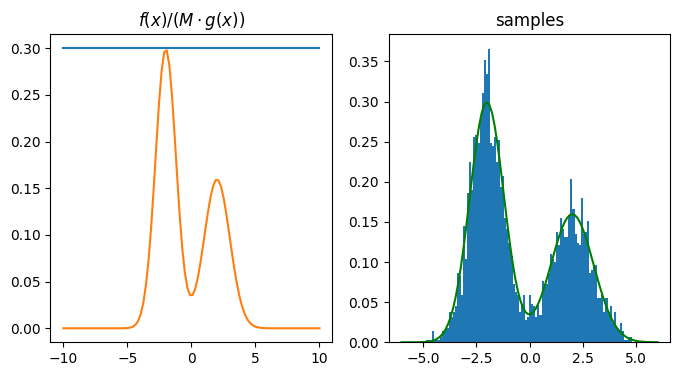

In [19]:
# Using a Uniform distribution as the proposal distribution
def unif_envelope_pdf(x):
    return 1/10

def unif_envelope_sample():
    return 10*random.rand()-5

M = 3
N = 3000
mysample = RejectionSampler(target_pdf, unif_envelope_pdf, unif_envelope_sample, M, N)
fig, ax = plt.subplots(1, 2, figsize =(8, 4))
t = np.linspace(-6, 6, 100)
t2 = np.linspace(-10, 10, 100)
 
ax[0].plot(t2, M*(0.1)*np.ones(len(t2)))
ax[0].plot(t2, target_pdf(t2))
ax[0].set_title('$f(x) / (M \cdot g(x))$')
ax[1].hist(mysample, 100, density=True)

ax[1].plot(t, target_pdf(t), 'g')
ax[1].set_title('samples')
plt.show()

The fact that the target is simple and due to the law of large numbers, we do not see appreciable difference in the two methods, but the closer the envelope is to the target (closer ie KL diveregence btw target and env), the better the sampling process. 
